# Assignment Instructions

In [1]:
### Multilateral Development Institution Data
foo <- read.csv("https://tinyurl.com/yb4phxx8") # read in the data

# column names
names(foo)

# dimensions of the data set
dim(foo)

# quick look at the data structure
head(foo)

# one thing to be very careful with (in this data set) is the use of dates. 8 columns involve dates.

# take note of the columns representing calendar dates
date.columns <- c(11, 12, 14, 15, 16, 17, 18, 25)

[1] "Number"                  "Status"                 
 [3] "Cluster"                 "Prefix"                 
 [5] "Type"                    "Country"                
 [7] "Dept"                    "Division"               
 [9] "LTAA"                    "Loan"                   
[11] "ApprovalDate"            "AgreementDate"          
[13] "Agreement"               "EffectivityDate"        
[15] "CancellationDate"        "FinancialCompletionDate"
[17] "OriginalCompletionDate"  "RevisedCompletionDate"  
[19] "JSF"                     "Fund"                   
[21] "RevisedAmount"           "Rating"                 
[23] "No"                      "PCR"                    
[25] "CirculationDate"

[1] 9016   25

Number,Status,Cluster,Prefix,Type,Country,Dept,Division,LTAA,Loan,...,FinancialCompletionDate,OriginalCompletionDate,RevisedCompletionDate,JSF,Fund,RevisedAmount,Rating,No,PCR,CirculationDate
5001,Financially Completed,,R,RETA,REG,,,"Agriculture, natural resources and rural development",0,...,1987-12-31,,1987-12-31,NA,2,0.155,NA,,,
1,Financially Completed,,,ADTA,INO,,,"Agriculture, natural resources and rural development",0,...,1968-07-31,,1968-07-31,NA,2,0.080,NA,,,
2,Financially Completed,,,ADTA,KOR,,,"Agriculture, natural resources and rural development",0,...,1969-10-31,,1969-10-31,NA,2,0.067,NA,,,
3,Financially Completed,,,ADTA,PHI,,,"Agriculture, natural resources and rural development",0,...,1970-01-31,,1970-01-31,NA,2,0.105,NA,,,
4,Financially Completed,,,ADTA,VIE,,,Finance,0,...,1972-08-31,,1972-08-31,NA,2,0.115,NA,,,
5,Financially Completed,,,PPTA,PHI,,,Transport,0,...,1970-03-31,,1970-03-31,NA,2,0.325,NA,,,


In [2]:
# these columns need some tweaking--I want to address missing values, calling the blank (empty) 
# elements "NA" instead of leaving them blank, and I wish to tell R these are "Date" objects.

for(i in date.columns)  # this "for loop" only loops through the "date.columns" -- no other columns.

  {
  
  # identify which values are missing in the "i"th column of the foo data set
  which_values_are_missing <- which(as.character(foo[, i]) == "")
  
  # those values that are missing (blank) in the "i"th column are replaced by <NA>
  # because R knows how to handle "NA" -- NA means something special in R--blanks are handled 
  # more unpredictably (which is bad).
  foo[which_values_are_missing, i] <- NA
  
  # last step--replace each of these columns (which is structured as a column of "factor" values)
  # as a column of dates--i.e., convert them to an object of "class" = Date. They are dates, after all.
  # And if you convert them to the Date class, R will know they are dates and you can manipulate 
  # dates in a simple, straightforward way. Otherwise, you won't be able to easily manipulate them
  # arithmetically.  E.g., for simple Date operations, see lines 48-58 below...
  # **By the way, if you don't understand what a "factor" is in R, you should Google it.** 
  foo[, i] <- as.Date(as.character(foo[, i]))

}

In [3]:
# Now R knows that these columns are comprised of dates
# After replication, I obtain the same results as the github post. 

foo[3,12]

[1] "1968-03-13"

In [4]:
foo[4,12]

[1] "1968-07-03"

In [5]:
foo[3,12] - foo[4,12]

Time difference of -112 days

In [6]:
# Also, one additional helpful hint... How to eliminate rows with NAs...
# The "is.na" function--for more info, Google it or type ?is.na at the R command prompt in the console.
which.have.NAs <- which(is.na(foo$Rating == TRUE)) # for which rows is the claim "is.na" a TRUE claim?

# Then, if you wanted to, e.g., remove all those rows, retaining only the rows with ratings...
new_foo <- foo[-which.have.NAs, ]
# Notice I called this tweaked data set "new_foo" instead of rewriting over the original data set...
# It's a bit safer to do this, in case I decide I want to quickly revert back to the original data set.


In [7]:
head(new_foo)

,Number,Status,Cluster,Prefix,Type,Country,Dept,Division,LTAA,Loan,...,FinancialCompletionDate,OriginalCompletionDate,RevisedCompletionDate,JSF,Fund,RevisedAmount,Rating,No,PCR,CirculationDate
1576,1243,Financially Completed,,,ADTA,PHI,RMU,AEFN,"Agriculture, natural resources and rural development",999,...,1997-01-31,NA,1992-04-30,NA,2,0.60,0,,173-03,2003-07-28
1581,1248,Financially Completed,,,ADTA,PAK,AWD,AWWU,Water and other urban infrastructure and services,1004,...,1994-03-31,NA,NA,1,4,0.70,2,,307-03,2003-12-10
1582,1249,Financially Completed,,,ADTA,PAK,AWD,AWWU,Water and other urban infrastructure and services,1004,...,1996-05-31,NA,NA,1,4,0.60,3,,307-03,2003-12-10
1583,1250,Financially Completed,,S,PPTA,TON,VPPC,EIPE,Energy,0,...,1992-01-31,NA,1992-01-31,NA,2,0.10,2,79-97,,1997-05-16
1746,1365,Financially Completed,,,ADTA,IND,IWD,IWEN,Energy,1029,...,1998-05-31,NA,NA,NA,2,0.74,2,,318-02,2002-12-12
1747,1366,Financially Completed,,,ADTA,IND,VPPC,EIPW,Energy,1029,...,1995-12-31,NA,NA,NA,2,0.49,2,,318-02,2002-12-12


In [8]:
names(new_foo)

[1] "Number"                  "Status"                 
 [3] "Cluster"                 "Prefix"                 
 [5] "Type"                    "Country"                
 [7] "Dept"                    "Division"               
 [9] "LTAA"                    "Loan"                   
[11] "ApprovalDate"            "AgreementDate"          
[13] "Agreement"               "EffectivityDate"        
[15] "CancellationDate"        "FinancialCompletionDate"
[17] "OriginalCompletionDate"  "RevisedCompletionDate"  
[19] "JSF"                     "Fund"                   
[21] "RevisedAmount"           "Rating"                 
[23] "No"                      "PCR"                    
[25] "CirculationDate"

# Questions

### (1) When projects are approved, they are approved for a certain period of time (until the time of "original completion date"). While projects are active, this "original" completion date is often pushed out (extended), and then there is a "revised" completion date. 

You have been told that project duration at approval is generally about 2 years (24 months). In other words, (purportedly) when projects are approved, the difference between the original project completion date and the the approval date is (supposedly) approximately 24 months. 

### a) Is this claim true? Explain. (Remember, for this ENTIRE assignment, only consider projects with Circulation.Date >= 2008-01-01. This will be your only reminder...)

In [9]:
#I will initialize a vector test_foo for the dataset with non-missing "Circulation.Date" >= 2008-01-01.

test_foo <- new_foo[which(new_foo$CirculationDate >= "2008-01-01"),]

In [259]:
dim(test_foo)

[1] 1869   27

In [10]:
head(test_foo)

,Number,Status,Cluster,Prefix,Type,Country,Dept,Division,LTAA,Loan,...,FinancialCompletionDate,OriginalCompletionDate,RevisedCompletionDate,JSF,Fund,RevisedAmount,Rating,No,PCR,CirculationDate
2529,2001,Financially Completed,,,ADTA,IND,IWD,IWTC,Transport,1274,...,1998-08-31,NA,1996-06-30,NA,2,0.21,2,,13-08,2008-01-17
2530,2002,Financially Completed,,,ADTA,IND,IWD,IWTC,Transport,1274,...,1998-05-31,NA,1995-11-30,NA,2,0.24,2,,13-08,2008-01-17
2531,2003,Financially Completed,,,ADTA,IND,IWD,IWTC,Transport,1274,...,1998-04-30,NA,1995-11-30,NA,2,0.35,2,,13-08,2008-01-17
2754,5600,Financially Completed,,R,RETA,REG,PPFD,COCS,Public sector management,0,...,2004-10-29,2003-12-31,2003-12-31,NA,2,0.12,2,20-10,,2010-01-15
2904,5624,Financially Completed,,R,RETA,REG,PPFD,COPP,Public sector management,0,...,2002-04-30,NA,1997-12-31,NA,2,0.60,3,471-09,,2009-12-29
3059,2440,Financially Completed,,,ADTA,MLD,SFSP-AUS,SAOC**,Public sector management,0,...,2003-04-30,NA,1998-06-30,NA,2,0.40,2,309-09,,2009-10-30


In [11]:
# I am adding a new column to the dataset which lists the project duration in units of days 
test_foo$ProjectDuration <- test_foo$OriginalCompletionDate-test_foo$ApprovalDate

In [12]:
head(test_foo)

,Number,Status,Cluster,Prefix,Type,Country,Dept,Division,LTAA,Loan,...,OriginalCompletionDate,RevisedCompletionDate,JSF,Fund,RevisedAmount,Rating,No,PCR,CirculationDate,ProjectDuration
2529,2001,Financially Completed,,,ADTA,IND,IWD,IWTC,Transport,1274,...,NA,1996-06-30,NA,2,0.21,2,,13-08,2008-01-17,NA days
2530,2002,Financially Completed,,,ADTA,IND,IWD,IWTC,Transport,1274,...,NA,1995-11-30,NA,2,0.24,2,,13-08,2008-01-17,NA days
2531,2003,Financially Completed,,,ADTA,IND,IWD,IWTC,Transport,1274,...,NA,1995-11-30,NA,2,0.35,2,,13-08,2008-01-17,NA days
2754,5600,Financially Completed,,R,RETA,REG,PPFD,COCS,Public sector management,0,...,2003-12-31,2003-12-31,NA,2,0.12,2,20-10,,2010-01-15,3369 days
2904,5624,Financially Completed,,R,RETA,REG,PPFD,COPP,Public sector management,0,...,NA,1997-12-31,NA,2,0.60,3,471-09,,2009-12-29,NA days
3059,2440,Financially Completed,,,ADTA,MLD,SFSP-AUS,SAOC**,Public sector management,0,...,NA,1998-06-30,NA,2,0.40,2,309-09,,2009-10-30,NA days


In [13]:
#Upon inspecting the table, I realize that some projects don't have an original completion date. 
sum(is.na(test_foo$OriginalCompletionDate))
sum(is.na(test_foo$ApprovalDate))

[1] 20

[1] 0

In [14]:
#Since there are 'NA' values in the ProjectDuration column, I will set the na.rm logical to TRUE so that R can remove the missing values. 
#I will also divide the result by 365 to evaluate the average project duration in years.
mean(as.numeric(test_foo$ProjectDuration), na.rm = TRUE)/365
quantile(as.numeric(test_foo$ProjectDuration), na.rm = TRUE)/365

[1] 1.763254

0%        25%        50%        75%       100% 
0.04931507 1.09315068 1.62191781 2.14520548 9.23013699

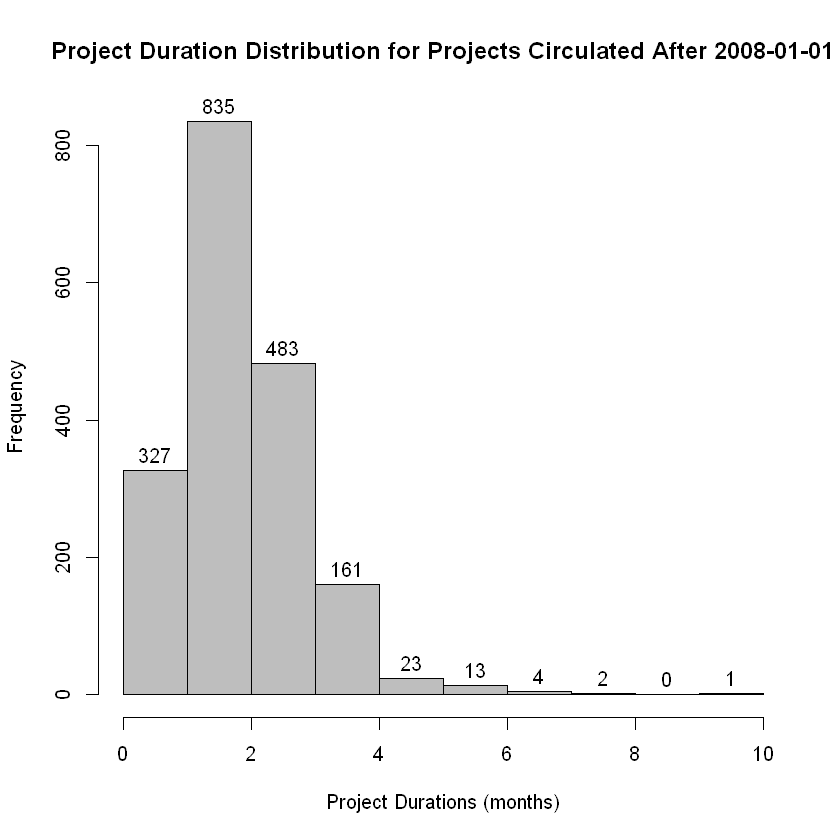

In [260]:
#Now, we will check the distribution of project duration in years to see how long different projects took to complete.
hist(as.numeric(test_foo$ProjectDuration)/365, main="Project Duration Distribution for Projects Circulated After 2008-01-01",xlab="Project Durations (months)",col="gray",label=TRUE,plot = TRUE)
#Note that the hist function automatically removes NA values while plotting the histogram. 

The average completion date of projects is less than 1.76 years (mean), with 50% of the projects completing within 1.62 years (median), however, some projects might take up to 10 years to complete. Therefore, if we take 'generally' to mean a simple average of all project durations, then only is the claim correct. From the quantiles, we can observe that the highest 25% of project durations are greater than 2 years (precisely, 2.15 years). 

### Has project duration at approval changed over time (consider projects circulated earlier and circulated later)?

In [16]:
range(test_foo$CirculationDate) #First, we will find the range of circulation dates. 

[1] "2008-01-07" "2018-06-29"

In [17]:
#Now, let's divide the range in half and separate the dataset accordingly.

diff <- as.Date(as.character("2018-06-29"), format="%Y-%m-%d")-
              as.Date(as.character("2008-01-07"), format="%Y-%m-%d")
print(diff/2)

cut_off <- as.Date(as.character("2008-01-07"), format="%Y-%m-%d") + diff/2
print(cut_off)

Time difference of 1913 days
[1] "2013-04-03"


In [18]:
circulated_earlier <- test_foo[which(new_foo$CirculationDate < "2013-04-03"),]
circulated_later <- test_foo[which(new_foo$CirculationDate >= "2013-04-03"),]

In [19]:
# I am adding a new column to each dataset which lists the project duration in units of days 
circulated_earlier$ProjectDuration <- circulated_earlier$OriginalCompletionDate-circulated_earlier$ApprovalDate

circulated_later$ProjectDuration <- circulated_later$OriginalCompletionDate-circulated_later$ApprovalDate

In [20]:
#Average project duration and quantiles for projects circulated before 2013-04-03

mean(as.numeric(circulated_earlier$ProjectDuration), na.rm = TRUE)/365
quantile(as.numeric(circulated_earlier$ProjectDuration), na.rm = TRUE)/365

[1] 1.764822

0%        25%        50%        75%       100% 
0.04931507 1.10684932 1.62465753 2.14383562 9.23013699

In [21]:
#Average project duration and quantiles for projects circulated after 2013-04-03

mean(as.numeric(circulated_later$ProjectDuration), na.rm = TRUE)/365
quantile(as.numeric(circulated_later$ProjectDuration), na.rm = TRUE)/365

[1] 1.647032

0%       25%       50%       75%      100% 
0.9452055 1.3650685 1.6794521 1.8089041 2.4657534

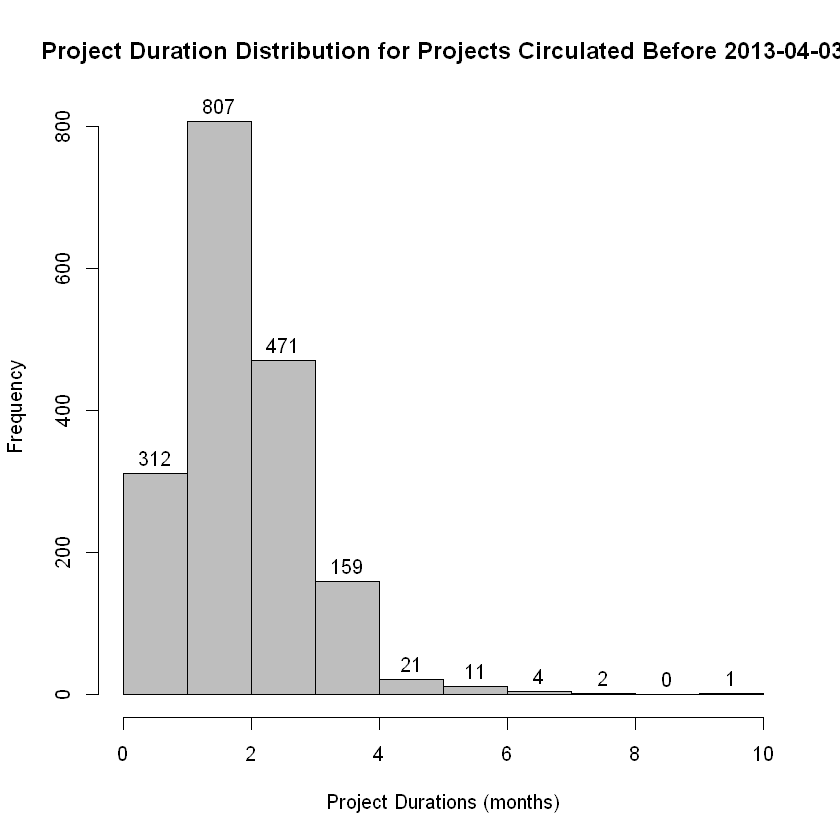

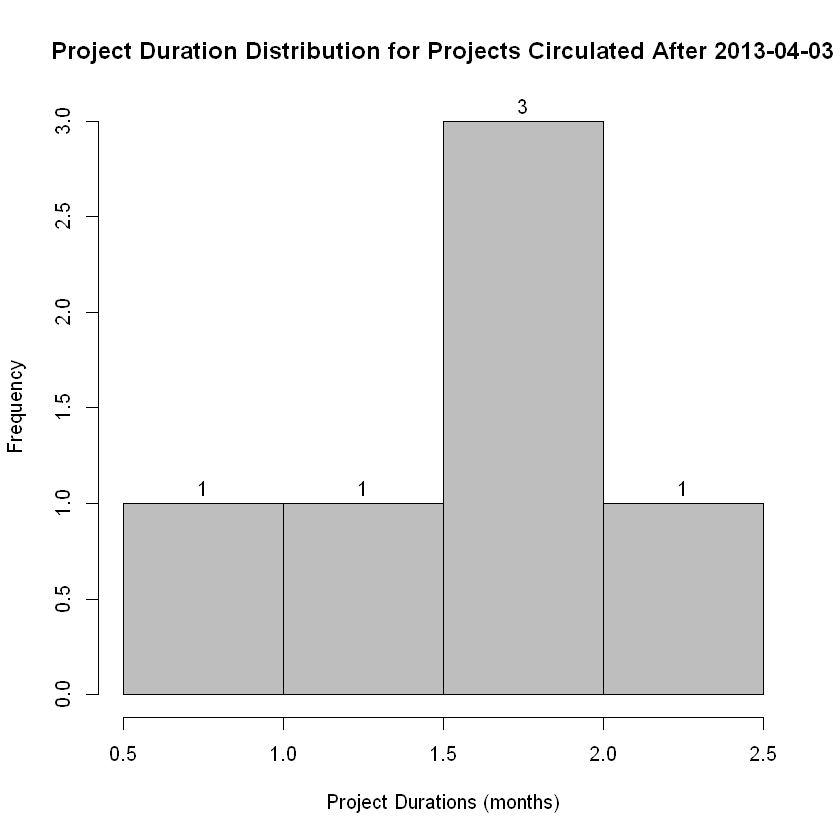

In [261]:
p1 <- hist(as.numeric(circulated_earlier$ProjectDuration)/365, main="Project Duration Distribution for Projects Circulated Before 2013-04-03",xlab="Project Durations (months)",col="gray",label=TRUE,plot = TRUE)
p2 <- hist(as.numeric(circulated_later$ProjectDuration)/365, main="Project Duration Distribution for Projects Circulated After 2013-04-03",xlab="Project Durations (months)",col="gray",label=TRUE,plot = TRUE)


Indeed, projects circulated before 2013-04-03 have a higher average project duration (1.76 years) at approval while projects circulated after 2013-04-03 have a lower average project duration (1.65 years). The 50th percentile for earlier projects is 1.62 years while for later projects is 1.68 which might suggest that project duration has actually increased. However, if we check the 100th percentile, we see that projects circulated earlier include ones which took nearly 9.23 years to complete whereas all projects circulated later were completed within 2.47 years. If we check the histograms for project duration distributions, we see that earlier projects are indeed skewed to the right. However, for a more definitive answer, we could conduct hypothesis testing of the difference between the two means. 

### b) How does original planned project duration differ from actual duration (if actual duration is measured as the duration between "ApprovalDate" and "RevisedCompletionDate"?)  

In [23]:
# I am adding a new column to the dataset which lists the actual project duration in units of days 
test_foo$ActualProjectDuration <- test_foo$RevisedCompletionDate-test_foo$ApprovalDate

In [24]:
head(test_foo)

,Number,Status,Cluster,Prefix,Type,Country,Dept,Division,LTAA,Loan,...,RevisedCompletionDate,JSF,Fund,RevisedAmount,Rating,No,PCR,CirculationDate,ProjectDuration,ActualProjectDuration
2529,2001,Financially Completed,,,ADTA,IND,IWD,IWTC,Transport,1274,...,1996-06-30,NA,2,0.21,2,,13-08,2008-01-17,NA days,944 days
2530,2002,Financially Completed,,,ADTA,IND,IWD,IWTC,Transport,1274,...,1995-11-30,NA,2,0.24,2,,13-08,2008-01-17,NA days,731 days
2531,2003,Financially Completed,,,ADTA,IND,IWD,IWTC,Transport,1274,...,1995-11-30,NA,2,0.35,2,,13-08,2008-01-17,NA days,731 days
2754,5600,Financially Completed,,R,RETA,REG,PPFD,COCS,Public sector management,0,...,2003-12-31,NA,2,0.12,2,20-10,,2010-01-15,3369 days,3369 days
2904,5624,Financially Completed,,R,RETA,REG,PPFD,COPP,Public sector management,0,...,1997-12-31,NA,2,0.60,3,471-09,,2009-12-29,NA days,1030 days
3059,2440,Financially Completed,,,ADTA,MLD,SFSP-AUS,SAOC**,Public sector management,0,...,1998-06-30,NA,2,0.40,2,309-09,,2009-10-30,NA days,964 days


In [25]:
#Upon inspecting the table, I realize that all projects have a revised completion date. 
sum(is.na(test_foo$RevisedCompletionDate))
sum(is.na(test_foo$ApprovalDate))

[1] 0

[1] 0

In [26]:
#Since there are no 'NA' values in the ActualProjectDuration column, I will set the na.rm logical to FALSE since R doesn't have to remove the missing values. 
#I will also divide the result by 365 to evaluate the average actual project duration in years.
mean(as.numeric(test_foo$ActualProjectDuration), na.rm = TRUE)/365
quantile(as.numeric(test_foo$ActualProjectDuration), na.rm = TRUE)/365

[1] 3.331799

0%        25%        50%        75%       100% 
 0.1534247  2.3013699  3.0657534  4.0493151 12.0410959

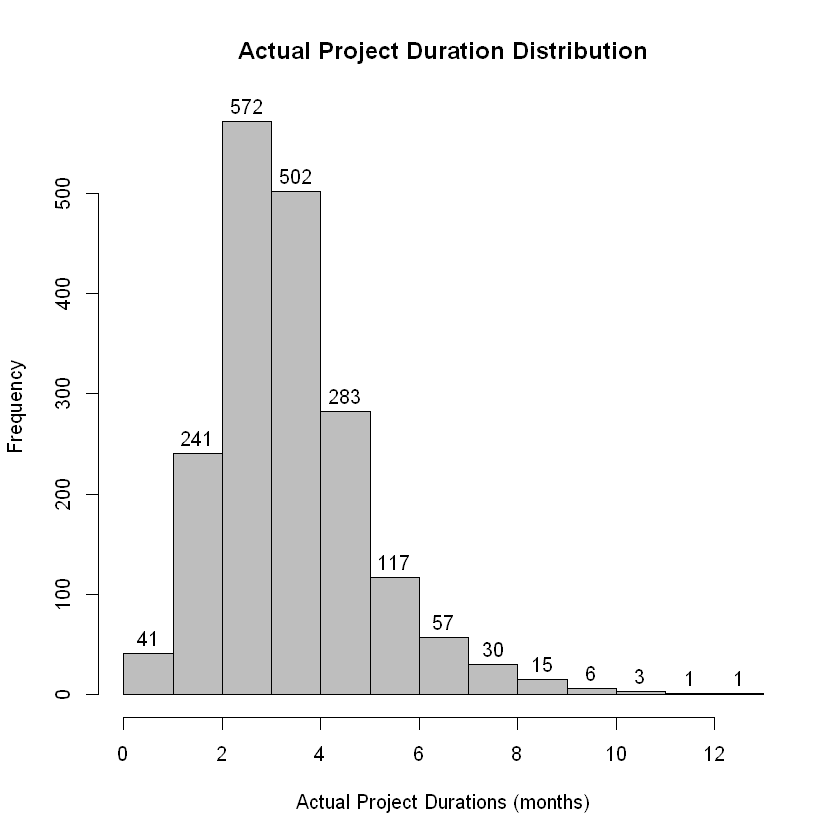

In [262]:
hist(as.numeric(test_foo$ActualProjectDuration)/365, main="Actual Project Duration Distribution",xlab="Actual Project Durations (months)",col="gray",label=TRUE,plot = TRUE)


In [28]:
#Now, we will calculate the average difference in means between actual project duration and original planned project duration. 
#We will also evaluate difference in quantiles. 
mean(as.numeric(test_foo$ActualProjectDuration - test_foo$ProjectDuration), na.rm = TRUE)/365
quantile(as.numeric(test_foo$ActualProjectDuration), na.rm = TRUE)/365 - quantile(as.numeric(test_foo$ProjectDuration), na.rm = TRUE)/365

[1] 1.57156

0%       25%       50%       75%      100% 
0.1041096 1.2082192 1.4438356 1.9041096 2.8109589

### b) How does original planned project duration differ from actual duration (if actual duration is measured as the duration between "ApprovalDate" and "RevisedCompletionDate"?)  

Actual duration appears to be greater on average by 1.57 years compared to the original planned project duration. The  difference persists for all the quantiles computed earlier, with actual duration being 1.44 years longer than original planned duration for the 50th percentiles. 

### 2) What % of projects that have ratings were rated 0? What % were rated 1? What % were rated 2? What % were rated 3? Answer these questions using a table or a figure. Provide a title AND an explanatory sentence or two that provides the numerical % results rounded to the nearest percentage-point.


In [29]:
#First, we will check if any of the projects are missing a rating. 
sum(is.na(test_foo$Rating))
range(test_foo$Rating) #Ratings range from 0 to 3.

[1] 0

[1] 0 3

In [30]:
zero_rating_index <- which(test_foo$Rating == "0")
zero_rating <- length(zero_rating_index) * 100/ dim(test_foo)[1]

In [31]:
one_rating_index <- which(test_foo$Rating == "1")
one_rating <- length(one_rating_index)* 100 / dim(test_foo)[1]

In [32]:
two_rating_index <- which(test_foo$Rating == "2")
two_rating <- length(two_rating_index)* 100 / dim(test_foo)[1]

In [33]:
three_rating_index <- which(test_foo$Rating == "3")
three_rating <- length(three_rating_index)* 100 / dim(test_foo)[1]

In [38]:
percentageA <- round(c(zero_rating, one_rating, two_rating, three_rating), 1)
Rate <- c("0","1","2","3")

In [125]:
df <- data.frame(Rate, Percentage = percentageA)
names(df) <- c('Ratings', "% of Projects")
df

Ratings,% of Projects
0,2.7
1,15.9
2,68.3
3,13.2


According to the figure above, 2.7% of projects were rated 0, 15.9% of projects were rated 1, 68.3% of projects were rated 2 and the remaining 13.2% of projects were rated 3. 

### 3) Repeat problem 2, but this time exclude all PPTA projects. PPTA projects are more prone to negative ratings, because after a certain point in time only the low-rated PPTA projects required ratings.  PPTA stands for "Project Preparatory Technical Assistance" and it is basically a project intended to set up a loan (often a very large multi-million-dollar loan). Only PPTAs that fail to "eventuate" to a loan are rated, which is why they are usually rated negatively.

In [48]:
#First, we will use the which function to find the indices of the PPTA projects. 
which.are.PPTAs <- which(test_foo$Type == "PPTA")

# Then,  we  will retain only the rows which exclude PPTA projects. 
new_test_foo <- test_foo[-which.are.PPTAs, ]

In [49]:
zero_rating_index <- which(new_test_foo$Rating == "0")
zero_rating <- length(zero_rating_index) * 100/ dim(new_test_foo)[1]

In [50]:
one_rating_index <- which(new_test_foo$Rating == "1")
one_rating <- length(one_rating_index)* 100 / dim(test_foo)[1]

In [51]:
two_rating_index <- which(new_test_foo$Rating == "2")
two_rating <- length(two_rating_index)* 100 / dim(test_foo)[1]

In [52]:
three_rating_index <- which(new_test_foo$Rating == "3")
three_rating <- length(three_rating_index)* 100 / dim(test_foo)[1]

In [53]:
percentageB <- round(c(zero_rating, one_rating, two_rating, three_rating), 1)
Rate <- c("0","1","2","3")

In [126]:
df1 <- data.frame(Rate, Percentage = percentageB, Difference = percentageA-percentageB)
names(df1) <- c('Ratings', '% of Projects excluding PPTAs',"Difference (Including PPTAs - Excluding PPTAs)")
df1

Ratings,% of Projects excluding PPTAs,Difference (Including PPTAs - Excluding PPTAs)
0,2.0,0.7
1,13.2,2.7
2,66.0,2.3
3,12.9,0.3


According to the figure above, 2.0% of projects were rated 0, 13.2% of projects were rated 1, 66.0% of projects were rated 2 and the remaining 12.9% of projects were rated 3. I've also plotted an extra column showing the difference between percentages for ratings which include PPTAs subtracted from percentages excluding PPTAs. The difference is greatest for 2nd rated projects, with a difference of 2.7%.

### 4) Identify the top 25% of projects by "Revised.Amount" and the bottom 25% of projects by "RevisedAmount". ("RevisedAmount" shows the final project budget.) Compare the ratings of these projects. 

In [240]:
top_revised_foo <- test_foo[test_foo$RevisedAmount > quantile(test_foo$RevisedAmount,prob=1-25/100),]
bottom_revised_foo <- test_foo[test_foo$RevisedAmount < quantile(test_foo$RevisedAmount,prob=25/100),]

In [241]:
dim(top_revised_foo)
dim(bottom_revised_foo)

[1] 405  27

[1] 421  27

In [242]:
top_zero_index <- which(top_revised_foo$Rating == "0")
zero_rating_top <- length(top_zero_index) * 100/ dim(top_revised_foo)[1]

bottom_zero_index <- which(bottom_revised_foo$Rating == "0")
zero_rating_bottom <- length(zero_rating_index) * 100/ dim(bottom_revised_foo)[1]

In [243]:
top_one_index <- which(top_revised_foo$Rating == "1")
one_rating_top <- length(top_one_index)* 100 / dim(top_revised_foo)[1]

bottom_one_index <- which(bottom_revised_foo$Rating == "1")
one_rating_bottom <- length(bottom_one_index)* 100 / dim(bottom_revised_foo)[1]

In [244]:
top_two_index <- which(top_revised_foo$Rating == "2")
two_rating_top <- length(top_two_index)* 100 / dim(top_revised_foo)[1]

bottom_two_index <- which(bottom_revised_foo$Rating == "2")
two_rating_bottom <- length(bottom_two_index)* 100 / dim(bottom_revised_foo)[1]

In [245]:
top_three_index <- which(top_revised_foo$Rating == "3")
three_rating_top <- length(top_three_index)* 100 / dim(top_revised_foo)[1]

bottom_three_index <- which(bottom_revised_foo$Rating == "3")
three_rating_bottom <- length(bottom_three_index)* 100 / dim(bottom_revised_foo)[1]

In [246]:
top_percentage <- round(c(zero_rating_top, one_rating_top, two_rating_top, three_rating_top), 1)
bottom_percentage <- round(c(zero_rating_bottom, one_rating_bottom, two_rating_bottom, three_rating_bottom), 1)

Rate <- c("0","1","2","3")

In [247]:
df2 <- data.frame(Rate, top_percentage, bottom_percentage, top_percentage - bottom_percentage )
names(df2) <- c('Ratings', 'Top 25%','Bottom 25%', "Difference (Top 25% - Bottom 25%)")
df2

Ratings,Top 25%,Bottom 25%,Difference (Top 25% - Bottom 25%)
0,3.0,8.3,-5.3
1,13.1,15.0,-1.9
2,70.1,69.1,1.0
3,13.8,13.8,0.0


In the figure above, I've plotted the % ranked for the top 25% of projects by Revised Amount and the bottom 25%. I've also included an extra column with the difference between the two project groupings. The greatest difference is in rank 0 projects, with the percentage of 1st rated projects in the top 25% being less by 5.3% compared to the bottom 25%. For first rate projects, the top 25% have -1.9% less than the bottom 25%. Finally, the percentage of 2nd rate projects are greater by 1.0% amongst the top 25% while the percentage of 3rd rate projects are the same. 

### Can you draw a causal conclusion about the effect of budget size on ratings? Why or why not? 

Hint: Compare the characteristics of the two project groupings, e.g., "Dept", "Division", "Cluster", "Country"

In [249]:
#Counts unique values of county

county_A <- aggregate(data.frame(count = top_revised_foo$Dept), list(value = top_revised_foo$Dept), length)
county_A[2] <- round(county_A[2] * 100/ dim(top_revised_foo)[1],2)
county_A <- county_A[order(-county_A$count),]
names(county_A) <- c("County (top 25%)", "Percentage Count")


county_B <- aggregate(data.frame(count = bottom_revised_foo$Dept), list(value = bottom_revised_foo$Dept), length)
county_B[2] <- round(county_B[2] * 100/ dim(bottom_revised_foo)[1],2)
county_B <- county_B[order(-county_B$count),]
names(county_B) <- c("County (bottom 25%)", "Percentage Count")



county_A
county_B


,County (top 25%),Percentage Count
12,SERD,29.14
11,SDCC,18.52
1,CWRD,13.09
10,SARD,12.84
7,PARD,7.16
2,EARD,6.67
3,ERCD,3.95
4,IED,1.98
6,OREI,1.98
5,OGC,1.23


,County (bottom 25%),Percentage Count
18,SERD,19.71
16,SARD,19.48
13,PARD,10.45
17,SDCC,10.21
2,CWRD,9.50
3,EARD,8.55
5,ERCD,6.41
12,OREI,3.56
15,PSOD,3.56
1,CTL,1.43


As the figures above illustrate, the SERD County had the highest project counts among both project groupings. In addition, SDCC, CWRD, PARD, EARD, ERCD and SARD saw many projects from both project groupings. However, the bottom 25% of projects by "RevisedAmount" include some new counties such as ECRD, OCO, and OAI but exclude IED. 

In [250]:
#Count unique values of division

division_A <- aggregate(data.frame(count = top_revised_foo$Division), list(value = top_revised_foo$Division), length)
division_A[2] <- round(division_A[2] * 100/ dim(top_revised_foo)[1],2)
names(division_A) <- c("Division (top 25%)", "Percentage Count")
division_B <- aggregate(data.frame(count = bottom_revised_foo$Division), list(value = bottom_revised_foo$Division), length)
division_B[2] <- round(division_B[2] * 100/ dim(bottom_revised_foo)[1],2)
names(division_B) <- c("Division (bottom 25%)", "Percentage Count")

dim(division_A)
dim(division_B)

[1] 83  2

[1] 96  2

In [251]:
#Since the dataframes are 83 and 118 rows long in total, I will only examine the top 10 divisions with the highest count.
top_division_A <- head(division_A[order(-division_A[2]),], 10)
names(top_division_A) <- c("10 Divisions with highest projects (top 25%)", "Percentage Count")
top_division_A

top_division_B <- head(division_B[order(-division_B[2]),], 10)
names(top_division_B) <- c("10 Divisions with highest projects (bottom 25%)", "Percentage Count")
top_division_B

,10 Divisions with highest projects (top 25%),Percentage Count
70,SEPF,5.68
66,SEER,4.94
60,SDSC,4.20
65,SEEN,3.46
24,INRM,3.21
3,CWEN,2.72
57,SDES,2.47
35,PATE,2.22
50,SAPF,2.22
21,GAFSP,1.98


,10 Divisions with highest projects (bottom 25%),Percentage Count
82,SEPF,3.80
45,PAHQ,3.33
65,SAPF,3.33
4,CARM,2.38
24,ERDI,2.38
73,SDGG,2.38
10,CWPF,2.14
23,ERCI,2.14
46,PATE,2.14
61,SAEN,2.14


As the figures above illustrate, the SEPF division had the highest project count in both project groupings. The bottom 25% also had the second highest percentage count for the PAHQ division, which isn't mentioned in the top 25%'s list. Further, CWPF, EAER, EAPH and etc, are among the divisions which didn't make it to the top 10 list for the top 25% but are present with high counts in the top 10 list for the bottom 25%. 

In [252]:
#Count unique values of Cluster

cluster_A <- aggregate(data.frame(count = top_revised_foo$Cluster), list(value = top_revised_foo$Cluster), length)
cluster_A[2] <- round(cluster_A[2] * 100/ dim(top_revised_foo)[1],2)
names(cluster_A) <- c("Cluster (top 25%)", "Count")
cluster_A <- cluster_A[order(-cluster_A[2]),]

cluster_B <- aggregate(data.frame(count = bottom_revised_foo$Cluster), list(value = bottom_revised_foo$Cluster), length)
cluster_B[2] <- round(cluster_B[2] * 100/ dim(bottom_revised_foo)[1],2)
names(cluster_B) <- c("Cluster (bottom 25%)", "Percentage Count")
cluster_B <- cluster_B[order(-cluster_B[2]),]

cluster_A
cluster_B

,Cluster (top 25%),Count
1,,96.54
3,C003,1.48
4,C006,0.99
5,C009,0.49
2,C002,0.25
6,C011,0.25


Cluster (bottom 25%),Percentage Count
,98.10
C003,1.43
C006,0.24
C009,0.24


It's difficult to draw any definite conclusions from the Cluster data because most projects aren't categorized. However, for both project groupings, C003, C006 and C009 saw the highest project numbers. In the top 25% of projects by "RevisedAmount", there are extra clusters of C002 and C011 which aren't present in the bottom 25%. 

In [256]:
#Count unique values of country

country_A <- aggregate(data.frame(count = top_revised_foo$Country), list(value = top_revised_foo$Country), length)
country_A[2] <- round(country_A[2] * 100/ dim(top_revised_foo)[1],2)
names(country_A) <- c("Country (top 25%)", " Percentage Count")
country_A <- country_A[order(-country_A[2]),]

country_B <- aggregate(data.frame(count = bottom_revised_foo$Country), list(value = bottom_revised_foo$Country), length)
country_B[2] <- round(country_B[2] * 100/ dim(bottom_revised_foo)[1],2)
names(country_B) <- c("Country (bottom 25%)", "Percentage Count")
country_B <- country_B[order(-country_B[2]),]

country_A
country_B
dim(country_A)
dim(country_B)



,Country (top 25%),Percentage Count
21,REG,51.85
8,IND,7.16
9,INO,5.19
30,VIE,3.95
1,AFG,3.46
20,PRC,3.46
17,PAK,3.21
18,PHI,3.21
15,MYA,2.47
5,CAM,1.98


,Country (bottom 25%),Percentage Count
27,REG,38.95
26,PRC,7.36
10,IND,5.46
21,NEP,3.80
3,BAN,3.56
22,PAK,3.33
24,PHI,3.33
5,CAM,3.09
4,BHU,2.61
19,MYA,2.38


[1] 30  2

[1] 40  2

Among both country groupings, India, Indonesia and Vietnam have the highest project counts in the top 25% and China, India and Nepal have the highest percentage count in the botton 25%. The list for the bottom 25% is also longer by 10 countries, indicating that projects spanned across various countries compared to the top 25%. 

In [257]:
#Count unique values of type

type_A <- aggregate(data.frame(count = top_revised_foo$Type), list(value = top_revised_foo$Type), length)
type_A[2] <- round(type_A[2] * 100/ dim(top_revised_foo)[1],2)
type_A <- type_A[order(-type_A[2]),]
names(type_A) <- c("Type (top 25%)", "Percentage Count")
type_B <- aggregate(data.frame(count = bottom_revised_foo$Type), list(value = bottom_revised_foo$Type), length)
type_B[2] <- round(type_B[2] * 100/ dim(bottom_revised_foo)[1],2)
type_B <- type_B[order(-type_B[2]),]
names(type_B) <- c("Type (bottom 25%)", "Percentage Count")

type_A
type_B

,Type (top 25%),Percentage Count
3,CDTA,29.38
7,RETA,23.46
1,ADTA,20.25
4,PATA,13.33
6,RDTA,6.91
5,PPTA,6.17
2,ADTA-LRG,0.49


,Type (bottom 25%),Percentage Count
2,CDTA,32.78
1,ADTA,23.99
3,PATA,18.76
6,RETA,10.21
5,RDTA,9.74
4,PPTA,4.51


CDTA projects have the highest percentage count among the top 25% by Revised.Amount. In addition, PPTA projects very low percentage counts among both project groupings. 

Both project groupings occur in _similar_ countries, clusters, divisions and counties. With the exception of country, the top percentage count for each of the characteristics were the same across both project groupings, with the top 25% of projects located heavily in India while the bottom 25% of projects were located heavily in China. It is plausible that the top 25% projects have lower ratings due to a difference across this characteristic or because of an interaction between lower budget and country, but at this stage, I am not certain whether a causal relationship exists between budget sizes and ratings. Lastly, the bottom 25% has 421 entries, while the top 25% has 405 entries so it's difficult to draw direct comparisons, though I have used proportions to make it easier. 


### 5) Imagine your manager asks you to apply Jeremy Howard's drivetrain model to the problem of optimal budget-setting to maximize project success (i.e., "Rating"). 

In such a situation, what would be the:
 #### (a) decision problem or objective?
 
Our objective is to set the optimal budget to maximize Rating for different kinds of project proposals. Maximum rating in specific refers to a rating of 3. 
 
 #### (b) lever or levers?
 
A lever is defined as the input that we, the fund sponsors, can control. A good set of levers are the features of the budget e.g. amount, whether all the funds are given at once or in intervals over time, how often we expect to see reports for how the funds are used. A lever might also include what amount of funds we allocate to each country, division, country, project type and cluster i.e. how we wish to divide the total funds that we have between the characteristics that we prioritize as a grant agency. For the sake of brevity, we will consider amount of budget as the only lever for the next questions.

 
 #### (c) ideal RCT design?
 
Before we begin our RCT design, it's important that we settle on a specific hypothesis that we want to test, because that will help us determine what data we need. In an ideal design, we will be able to check all combinations of characteristics, randomly assign the projects to different budgets and check the outcome ratings. For instance, if  we have project proposals in 3 different countries of two different types, we have 6 possible combinations of characteristics and so we must run 6 different RCTs. Ideally, we take all the projects of the same combination and randomly assign them to different budgets such as $1m, $2m, etc and compare their final ratings, while also setting up a control group which receives a control budget. Note that the control group cannot have a 0 budget, because without any budget, the project cannot happen and thus can't be rated, so instead a control group might receive a very low budget and we'll compare the ratings to projects of the same combination assigned to other budget treatments.

 
 #### (d) dependent variable(s) and independent variable(s) in the modeler
 
The independent variables in the modeler are the characteristics of each project. For instance, the independent variables for CDTA projects in China are type of project and country. Note that our model may also include an interaction variable if we have to make assumptions about linearity e.g. in a regression model. All three together would be the _predictors_ of our model. The dependent variable is the rating for each project and the treatment is the amount of budget allocated. 
 
 
 #### (e) And---Why would running RCTs and modeling/optimizing over RCT results be preferable to using (observational, non-RCT) "foo" data? 
 
RCTs are ideal because they have high internal validity i.e. we can establish causal conclusions with high probability between the predictor and outcome variables. In addition, RCTs eliminate bias in assigning interventions, specifically selection bias and confounding, by randomly assigning subjects to a treatment and control group. Observation or non-RCT analysis of "foo" data might give rise to spurious correlations, but only with RCTs, can we determine which budgets are optimal to maximize the ratings for which projects.